In [2]:
install.packages('xlsx', repos='https://cran.r-project.org/')

Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpuy5J45\downloaded_packages


In [3]:
library("xlsx")

Loading required package: rJava
Loading required package: xlsxjars


Adding xlsx to library

In [66]:
NHLDataframe <- read.xlsx("NHLTop100.xlsx", 1)
head(NHLDataframe)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


Fetch data from xlsx file

In [67]:
outputDataFrame <- data.frame(Plot=character(), Rsquare=double(), Pval=double())
newRow <- data.frame(Plot=character(), Rsquare=double(), Pval=double())

Declare output dataframe

In [68]:
getSlope <- function(x, y, intercept){
    return((y-intercept)/x)
}

Declaring a slope function to calculate the slope of the line based on its intercept


Call:
lm(formula = A ~ G, data = NHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


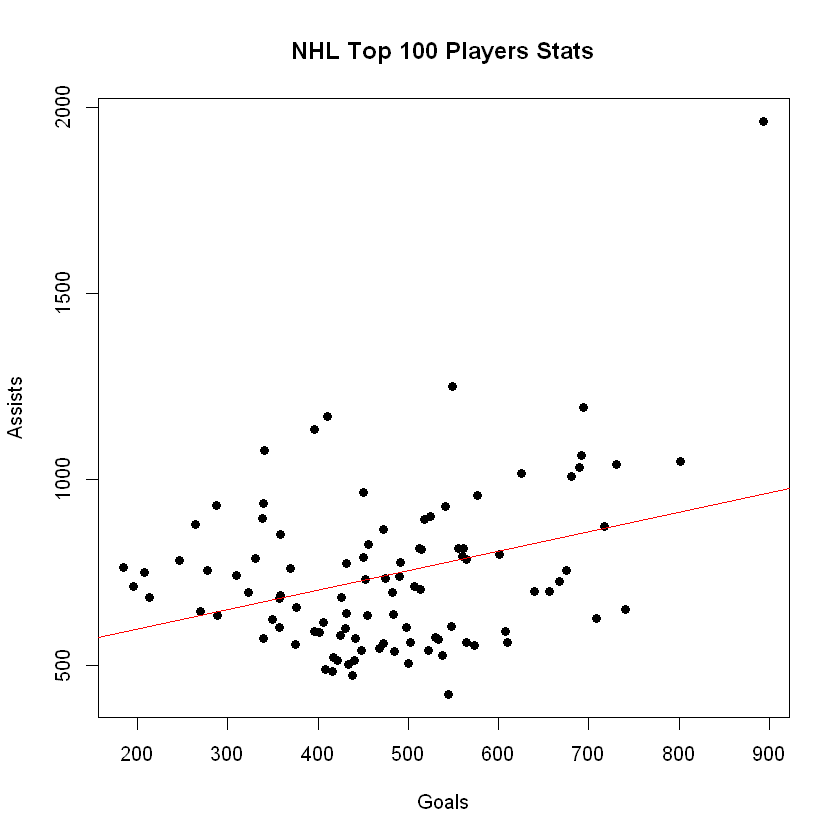

In [69]:
plot(NHLDataframe$A~NHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19)
linear_model <- lm(A ~ G, data=NHLDataframe)
summary(linear_model)
abline(linear_model, col="red")
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Basic LM", Rsquare=0.09913, Pval=0.0008317))

This is plot for the basic linear model derived from the data points.
The line passes through the intercept which is the point of intersection of the Y axix with the plotted line. 
Value of R and P is appended to the final output data frame.


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = NHLDataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


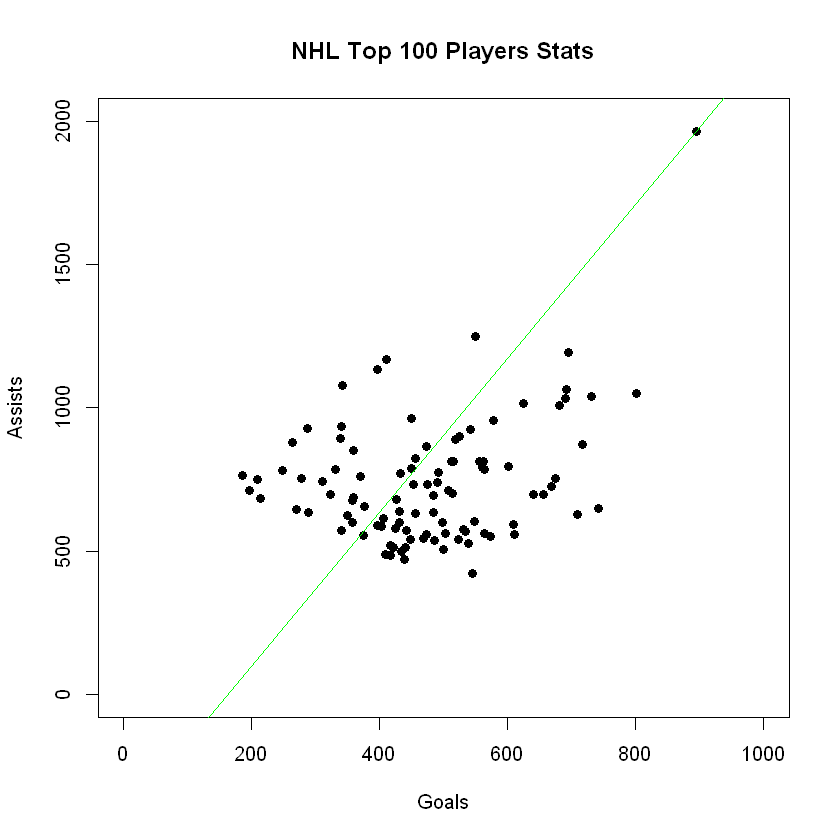

In [70]:
plot(NHLDataframe$A~NHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19, ylim=c(0,2000), xlim=c(0,1000))
nmod <- (lm(I(A-1963) ~ I(G-894) + 0, NHLDataframe))
summary(lm(I(A-1963) ~ I(G-894) + 0, NHLDataframe))
abline(predict(nmod, newdata = list(G=0))+1963, coef(nmod), col='green')
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Wayne LM without Intercept", Rsquare=0.9082, Pval=2.2e-16))

This plot has been created by forcing the linear model through the point plotted for Player Wayne Gretzky.
Here the plot is not restricted by the intercept(by adding +0 to the lm model) and thus provides a good linear model which passes to the specified point.


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = NHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


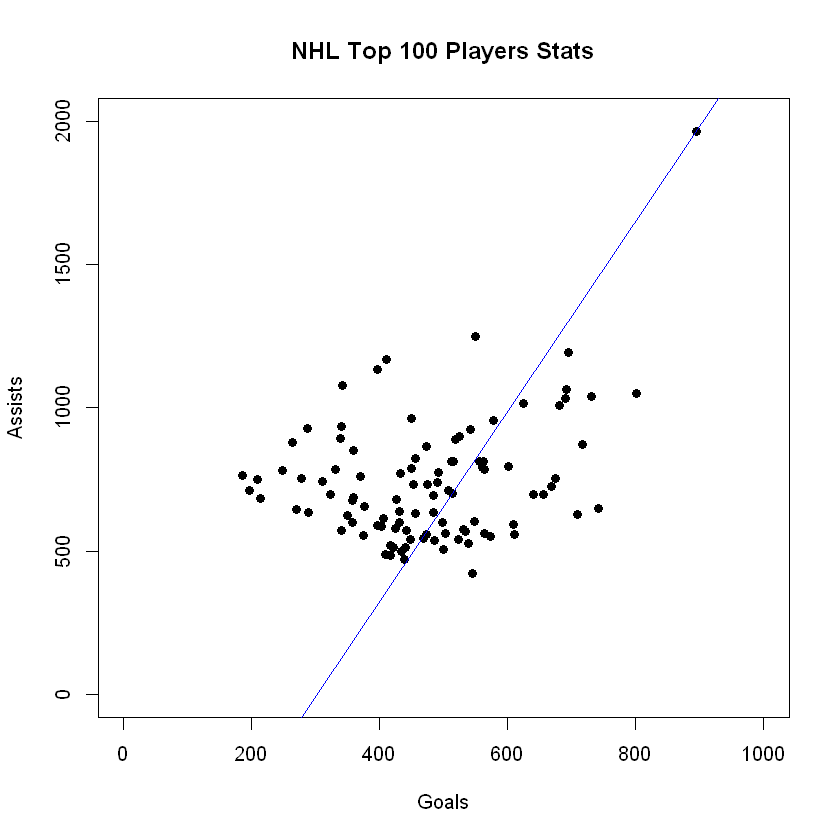

In [71]:
plot(NHLDataframe$A~NHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19, ylim=c(0,2000), xlim=c(0,1000))
linear_model <- (lm(I(A-1963) ~ I(G-894), NHLDataframe))
summary(lm(I(A-1963) ~ I(G-894), NHLDataframe))
slope <- getSlope(894, 1963, coef(linear_model)[1])
abline(a=coef(linear_model),b=slope, col='blue')
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Wayne LM with Intercept", Rsquare=0.09913, Pval=0.0008317))

Here the lm model has been forced to pass through the point plotted for Wayne Gretzky by keeping the intercept restriction.

In [72]:
newRow <- data.frame(101,"Patrick Kane","CHI","R","2007-2008","2016-2017",736,285,465,750,83,284,251,1,49,3,3,2294)
names(newRow) <- c("Rank","Player","Team","Pos","X1st.NHL.Season","Last.NHL.Season","GP","G","A","P","X...","PIM","PP","SH","GW","GT","OT","Shots"
)
updatedNHLDataframe <- rbind(NHLDataframe,newRow)

Adding a new record for Patrick Kane


Call:
lm(formula = I(A - 465) ~ I(G - 285) + 0, data = updatedNHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


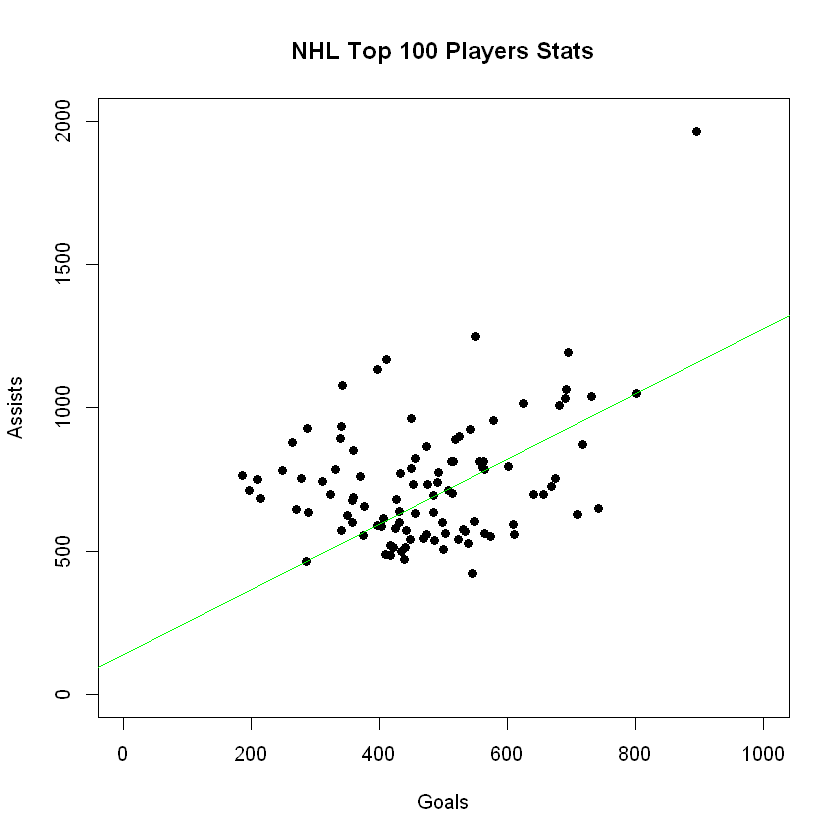

In [73]:
plot(updatedNHLDataframe$A~updatedNHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19, ylim=c(0,2000), xlim=c(0,1000))
linear_model <- lm(I(A-465) ~ I(G-285)+0, updatedNHLDataframe)
summary(linear_model)
nmod <- (linear_model)
abline(predict(nmod, newdata = list(G=0))+465, coef(nmod), col='green')
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Patrick LM without Intercept", Rsquare=0.5689, Pval=2.2e-16))

This plot has been created by forcing the linear model through the point plotted for Player Patrick Kane.
Here the plot is not restricted by the intercept(by adding +0 to the lm model) and thus provides a good linear model which passes to the specified point.


Call:
lm(formula = I(A - 465) ~ I(G - 285), data = updatedNHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 172.7210    34.8505   4.956 2.97e-06 ***
I(G - 285)    0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


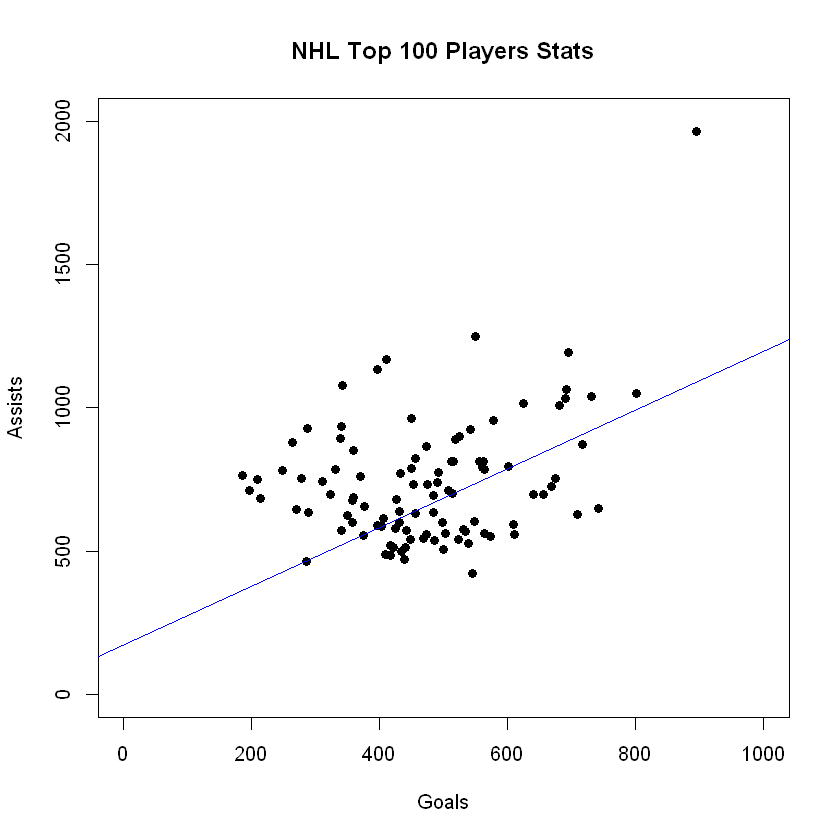

In [74]:
plot(updatedNHLDataframe$A~updatedNHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19, ylim=c(0,2000), xlim=c(0,1000))
linear_model <- (lm(I(A-465) ~ I(G-285), updatedNHLDataframe))
summary(linear_model)
slope <- getSlope(285, 465, coef(linear_model)[1])
abline(a=coef(linear_model),b=slope, col='blue')
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Patrick LM with Intercept", Rsquare=0.107, Pval=0.0004934))

Here the lm model has been forced to pass through the point plotted for Patrick Kane by keeping the intercept restriction.


Call:
lm(formula = I(A - 0) ~ I(G - 0) + 0, data = NHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
I(G - 0)  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = NHLDataframe)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(A - 465) ~ I(G - 285) + 0, data = NHLDataframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -115.74   40.97  167.13  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)   1.1346     0.0984   11.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231 on 99 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 132.9 on 1 and 99 DF,  p-value: < 2.2e-16


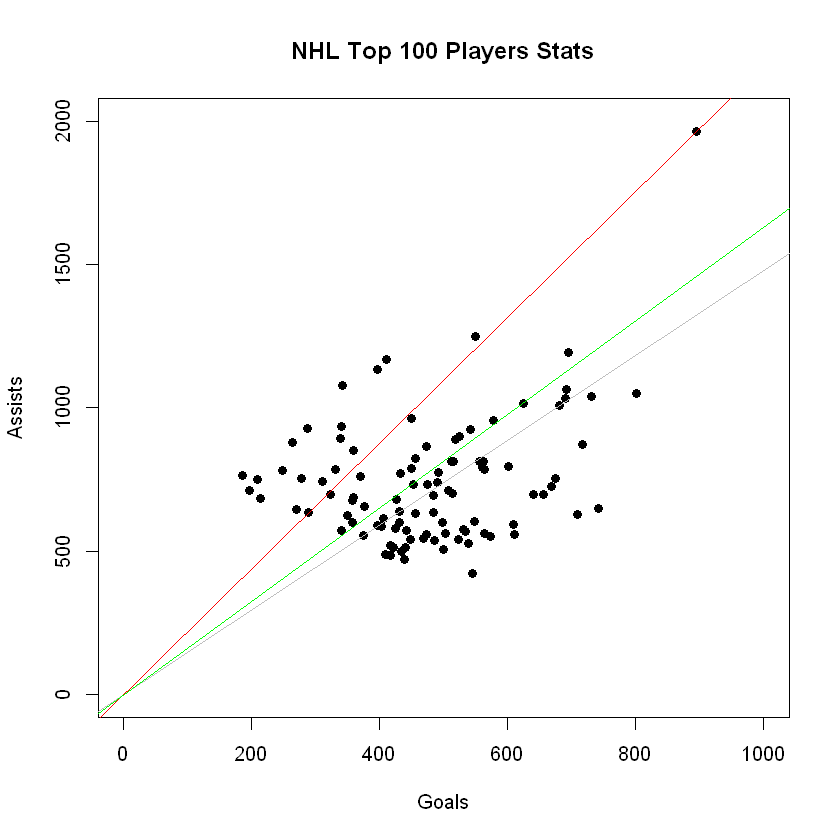

In [75]:
plot(NHLDataframe$A~NHLDataframe$G, main = "NHL Top 100 Players Stats", xlab = "Goals", ylab = "Assists", pch=19, ylim=c(0,2000), xlim=c(0,1000))
normalLM <- (lm(I(A-0) ~ I(G-0) + 0, NHLDataframe))
summary(normalLM)
abline(predict(normalLM, newdata = list(G=0))+0, coef(normalLM), col='grey')
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Normal Passing Origin", Rsquare=0.8972 , Pval=2.2e-16))
WayneLM <- (lm(I(A-1963) ~ I(G-894) + 0, NHLDataframe))
summary(WayneLM)
abline(a=0,b=1963/894,col="red")
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Wayne LM Passing Origin", Rsquare=0.9082, Pval=2.2e-16))
PatrickLM <- (lm(I(A-465) ~ I(G-285) + 0, NHLDataframe))
summary(PatrickLM)
abline(a=0,b=465/285,col="green")
outputDataFrame <- rbind(outputDataFrame, data.frame(Plot="Patrick LM Passing Origin", Rsquare=0.5689, Pval=2.2e-16))

In this line all the three models plotted are forced to pass through the origin and their values are added to the output.

In [76]:
outputDataFrame

Plot,Rsquare,Pval
Basic LM,0.09913,8.317e-04
Wayne LM without Intercept,0.90820,2.200e-16
Wayne LM with Intercept,0.09913,8.317e-04
Patrick LM without Intercept,0.56890,2.200e-16
Patrick LM with Intercept,0.10700,4.934e-04
Normal Passing Origin,0.89720,2.200e-16
Wayne LM Passing Origin,0.90820,2.200e-16
Patrick LM Passing Origin,0.56890,2.200e-16


Summary:
With the multiple graphs plotted for the same data set with the the deviations we can see that the value of R square and P value is changing. 

In [ ]:
References:
http://www.cse.buffalo.edu/~bina/cse487/spring2017/Lectures/classnotes.html#Part1